/home/karimi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/karimi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/karimi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/karimi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/karimi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/karimi/anaconda3/lib/python3.11/site-packages/skl

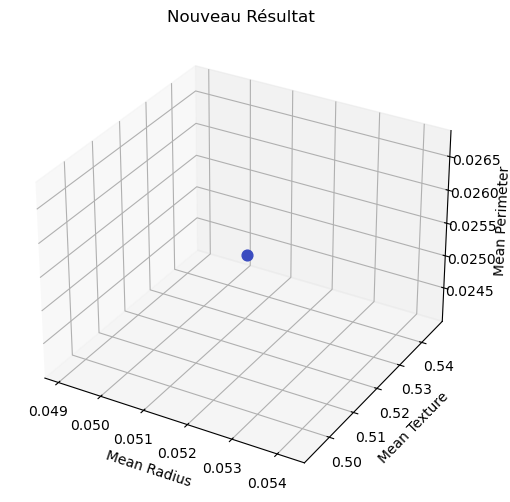

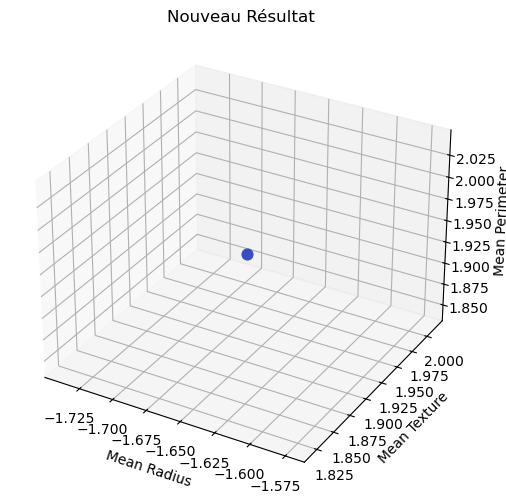

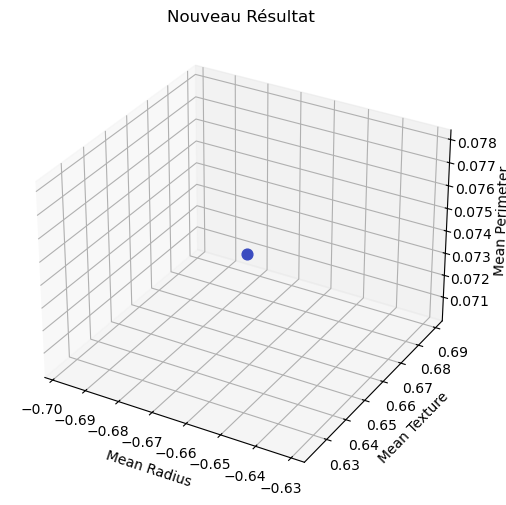

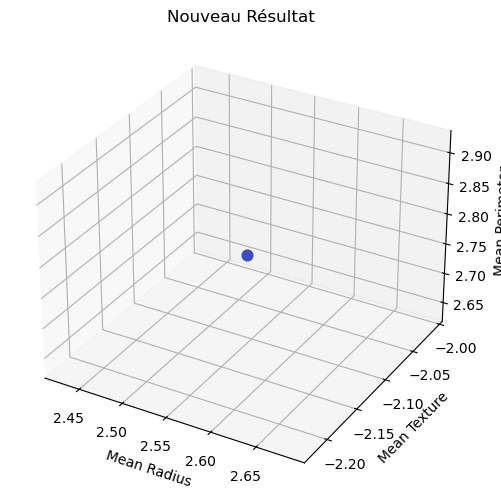

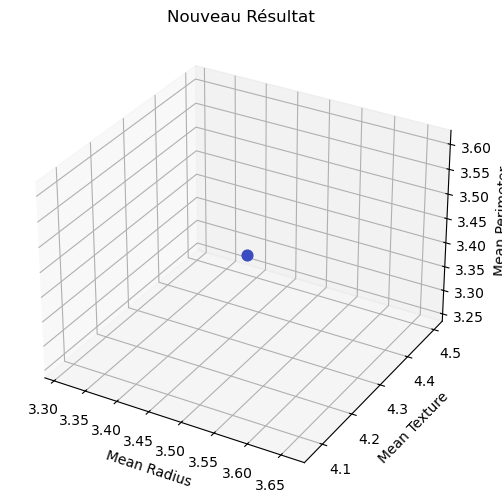

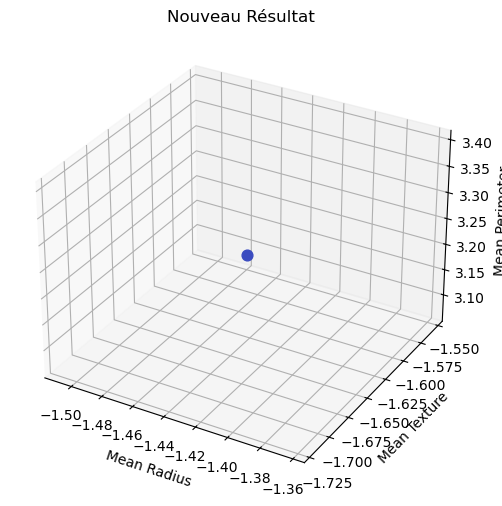

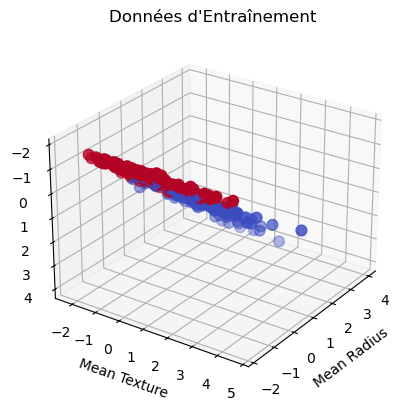

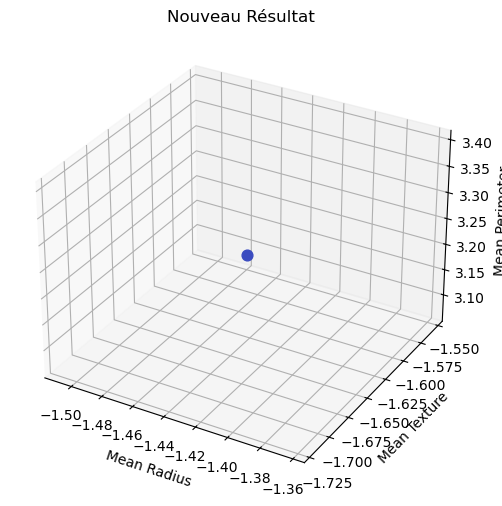

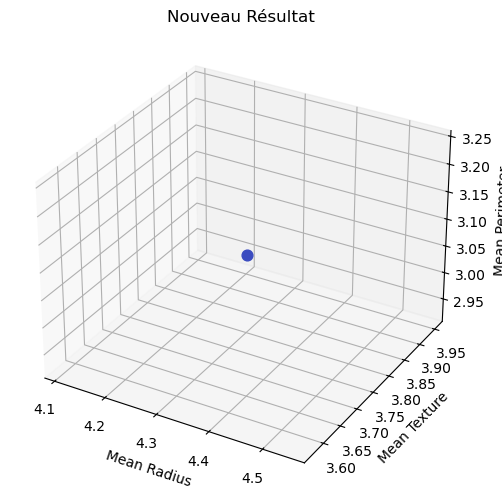

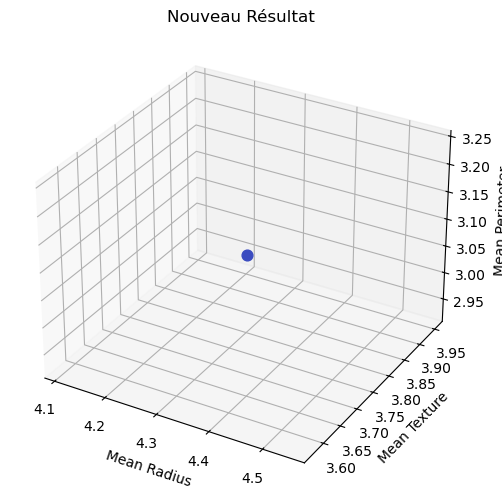

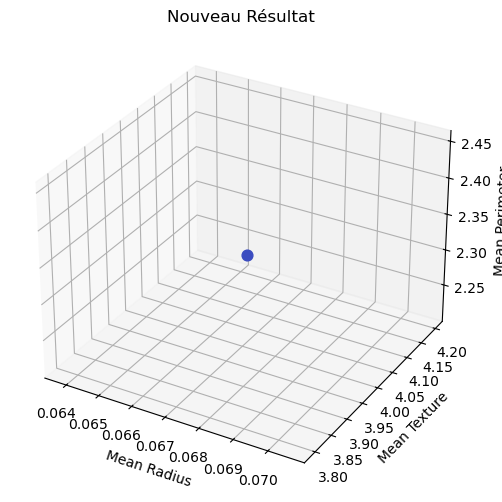

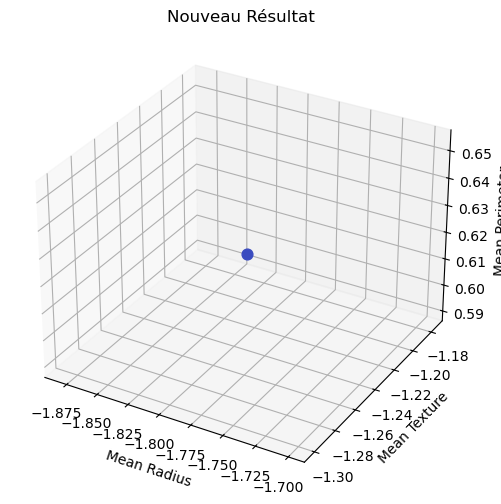

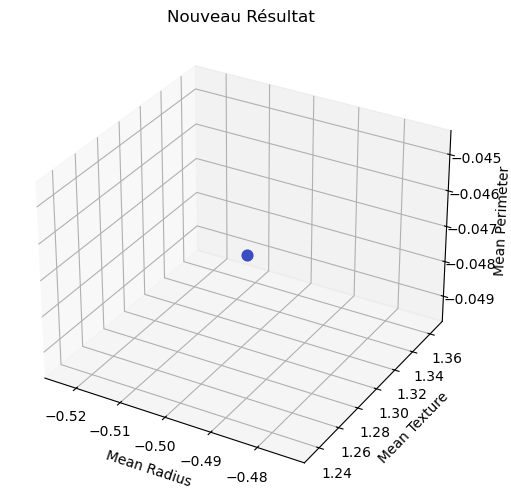

In [3]:
import tkinter as tk
from tkinter import messagebox, ttk, filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import random

class BreastCancerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Classification des Tumeurs du Sein")
        self.root.geometry("1000x600")
        
        # Création du cadre principal
        self.main_frame = tk.Frame(root)
        self.main_frame.pack(padx=20, pady=20, fill='both', expand=True)
        
        # Création des cadres pour les widgets
        self.data_entry_frame = tk.Frame(self.main_frame, padx=10, pady=10, relief=tk.GROOVE, borderwidth=2)
        self.data_entry_frame.pack(side=tk.LEFT, padx=10, pady=10, fill='both', expand=True)
        
        self.result_display_frame = tk.Frame(self.main_frame, padx=10, pady=10, relief=tk.GROOVE, borderwidth=2)
        self.result_display_frame.pack(side=tk.RIGHT, padx=10, pady=10, fill='both', expand=True)
        
        # Création des widgets
        self.create_data_entry_widgets()
        self.create_result_display_widgets()
        
        # Chargement et préparation des données
        self.load_and_prepare_data()
        # Affichage des données initiales
        self.plot_data(self.X_train, self.y_train, "Données d'Entraînement")
    
    def create_data_entry_widgets(self):
        # Création des étiquettes et des champs de saisie
        self.features = ['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness']
        self.entries = {}
        for i, feature in enumerate(self.features):
            tk.Label(self.data_entry_frame, text=feature + ':').grid(row=i, column=0, padx=5, pady=5, sticky='e')
            entry = tk.Entry(self.data_entry_frame, width=15)
            entry.grid(row=i, column=1, padx=5, pady=5)
            self.entries[feature] = entry
        
        # Création du bouton de classification
        classify_button = tk.Button(self.data_entry_frame, text="Classifier", command=self.classify)
        classify_button.grid(row=len(self.features), columnspan=2, pady=10)

        # Création du bouton pour télécharger le dataset
        upload_button = tk.Button(self.data_entry_frame, text="Télécharger le Dataset", command=self.upload_dataset)
        upload_button.grid(row=len(self.features) + 1, columnspan=2, pady=10)

        # Création du bouton pour remplir les champs avec des valeurs de test
        fill_test_button = tk.Button(self.data_entry_frame, text="Remplir pour tester", command=self.fill_test_values)
        fill_test_button.grid(row=len(self.features) + 2, columnspan=2, pady=10)

        # Création du bouton pour remplir les champs avec des valeurs aléatoires
        fill_random_button = tk.Button(self.data_entry_frame, text="Remplir aléatoirement", command=self.fill_random_values)
        fill_random_button.grid(row=len(self.features) + 3, columnspan=2, pady=10)
    
    def create_result_display_widgets(self):
        # Création de l'étiquette de résultat
        self.result_label = tk.Label(self.result_display_frame, text="Résultat de la classification:", font=("Helvetica", 14, "bold"))
        self.result_label.pack(pady=10)

        # Création de l'étiquette de résultat dynamique
        self.dynamic_result_label = tk.Label(self.result_display_frame, text="", font=("Helvetica", 12))
        self.dynamic_result_label.pack(pady=10)

        # Création de l'étiquette pour afficher la précision
        self.accuracy_label = tk.Label(self.result_display_frame, text="Précision:", font=("Helvetica", 12, "bold"))
        self.accuracy_label.pack(pady=5)

        # Création de l'étiquette pour afficher la précision
        self.precision_label = tk.Label(self.result_display_frame, text="Précision:", font=("Helvetica", 12, "bold"))
        self.precision_label.pack(pady=5)

        # Création de l'étiquette pour afficher le rappel
        self.recall_label = tk.Label(self.result_display_frame, text="Rappel:", font=("Helvetica", 12, "bold"))
        self.recall_label.pack(pady=5)

        # Création de l'étiquette pour afficher le score F1
        self.f1_label = tk.Label(self.result_display_frame, text="Score F1:", font=("Helvetica", 12, "bold"))
        self.f1_label.pack(pady=5)

        # Création de l'étiquette pour afficher la matrice de confusion
        self.confusion_matrix_label = tk.Label(self.result_display_frame, text="Matrice de Confusion:", font=("Helvetica", 12, "bold"))
        self.confusion_matrix_label.pack(pady=5)

        # Création de la zone de texte pour afficher l'historique des résultats
        self.history_label = tk.Label(self.result_display_frame, text="Historique des résultats:", font=("Helvetica", 12, "bold"))
        self.history_label.pack(pady=10)

        self.result_history = tk.Text(self.result_display_frame, height=10, width=50)
        self.result_history.pack(pady=10)
        self.result_history.config(state=tk.DISABLED)

        # Création du canevas pour afficher les graphiques
        self.canvas = tk.Canvas(self.result_display_frame, width=400, height=400)
        self.canvas.pack(pady=10)

    
    def load_and_prepare_data(self):
        # Charger les données à partir d'un fichier CSV local
        data = pd.read_csv('Breast_cancer_data.csv')
        self.X = data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
        self.y = data['diagnosis']

        # Diviser les données en ensembles d'entraînement et de test
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
        # Normaliser les données
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        
        # Créer et entraîner le modèle SVM
        self.model = SVC(kernel='linear')
        self.model.fit(self.X_train, self.y_train)
    



    def classify(self):
        try:
            # Récupérer les données saisies
            input_data = [float(self.entries[feature].get()) for feature in self.features]
            # Normaliser les données
            input_data = self.scaler.transform([input_data])
            # Prédire la classe de la tumeur
            prediction = self.model.predict(input_data)
            # Calculer les mesures d'évaluation
            accuracy = accuracy_score(self.y_test, self.model.predict(self.X_test))
            precision = precision_score(self.y_test, self.model.predict(self.X_test))
            recall = recall_score(self.y_test, self.model.predict(self.X_test))
            f1 = f1_score(self.y_test, self.model.predict(self.X_test))
            confusion = confusion_matrix(self.y_test, self.model.predict(self.X_test))

            # Afficher les mesures d'évaluation dans l'interface
            self.accuracy_label.config(text=f"Précision: {accuracy:.2f}")
            self.precision_label.config(text=f"Précision: {precision:.2f}")
            self.recall_label.config(text=f"Rappel: {recall:.2f}")
            self.f1_label.config(text=f"Score F1: {f1:.2f}")
            self.confusion_matrix_label.config(text=f"Matrice de Confusion:\n{confusion}")

            # Afficher le résultat de la classification dans l'interface
            if prediction[0] == 1:
                result_text = "Maligne"
                result_color = "red"
            else:
                result_text = "Bénigne"
                result_color = "green"

            self.dynamic_result_label.config(text=f"Résultat: {result_text}", fg=result_color)
            # Ajouter le résultat à l'historique
            self.result_history.config(state=tk.NORMAL)
            self.result_history.insert(tk.END, f"Entrée: {input_data[0]}\nRésultat: {result_text}\n\n")
            self.result_history.config(state=tk.DISABLED)

            # Tracer le nouveau graphique
            self.plot_data(input_data, prediction, "Nouveau Résultat")

        except ValueError:
            messagebox.showerror("Erreur", "Veuillez entrer des valeurs numériques valides.")

    
    def upload_dataset(self):
        # Ouvrir une boîte de dialogue pour sélectionner le fichier
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                # Lire le fichier CSV
                data = pd.read_csv(file_path)
                # Remplir les champs d'entrée avec les premières lignes des données
                for i, feature in enumerate(self.features):
                    self.entries[feature].delete(0, tk.END)
                    self.entries[feature].insert(0, str(data[feature].iloc[0]))
            except Exception as e:
                messagebox.showerror("Erreur", f"Erreur lors du chargement du fichier : {e}")

    def fill_test_values(self):
        # Remplir les champs avec des valeurs de test prédéfinies
        test_values = [14.3, 21.4, 92.5, 631.5, 0.07]
        for feature, value in zip(self.features, test_values):
            self.entries[feature].delete(0, tk.END)
            self.entries[feature].insert(0, str(value))
    
    def fill_random_values(self):
        # Plages de valeurs aléatoires pour chaque caractéristique
        random_values = {
        'Mean Radius': (6, 30),
        'Mean Texture': (10, 40),
        'Mean Perimeter': (40, 190),
        'Mean Area': (100, 2500),
        'Mean Smoothness': (0.05, 0.2)
        }
        # Remplir les champs avec des valeurs aléatoires dans les plages spécifiées
        for feature, (min_val, max_val) in random_values.items():
            random_value = random.uniform(min_val, max_val)
            self.entries[feature].delete(0, tk.END)
            self.entries[feature].insert(0, str(random_value))

    
    def plot_data(self, X, y, title):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=60)
        ax.set_xlabel('Mean Radius')
        ax.set_ylabel('Mean Texture')
        ax.set_zlabel('Mean Perimeter')
        ax.set_title(title)

        # Afficher le plot sur l'interface
        canvas = FigureCanvasTkAgg(fig, master=self.canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

def main():
    root = tk.Tk()
    app = BreastCancerApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()

